In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 모델 생성 과정
#### 성별, 나이, 연봉을 변수로 차를 사는지 안사는지 예측하는 classifier를 만들었다(Logistic Regression 이용)

In [3]:
##import the dataset
dataset = pd.read_csv("./Social_Network_Ads.csv")
X  = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

##Splitting the dataset into the Training set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

#normalization
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Fitting the Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

C:\Users\YOONHOI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
y_pred ## y_pred는 내가 모델을 통해 예측해낸 값 이것이 실제 값과 일치할까??
       ## cross validation을 통해 한눈에 볼 수 있다!

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## 1. Confusion Matrix

In [55]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm
## 65 와 24는 각각 1을 1로 0을 0으로 예측을 성공해낸 개수!
## 나머지 3과 8은 예측을 실패한 개수!
## 성공률은 89/100  = 89%

array([[65,  3],
       [ 8, 24]])

## 2. ROC_curve

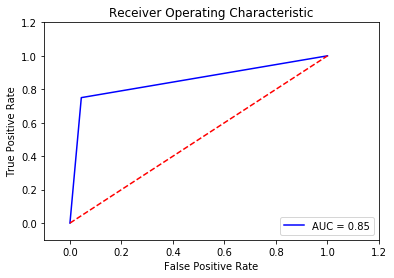

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,'b',label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
## 세로축은 True Positive의 비율 : 차를 산 사람을 정확히 예측
## 가로축은 False Positive의 비율 : 차를 안산 사람을 샀다고 잘못예측한 비율 

#### Precision, recall, fscore, support를 한번에 뽑을 수 있다

In [58]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test,y_pred)

In [67]:
print('precision: ' +str(precision[0]))
print('recall: ' +str(recall[0]))
print('fscore: ' +str(fscore[0]))
print('support: ' +str(support[0]))

precision: 0.890410958904
recall: 0.955882352941
fscore: 0.921985815603
support: 68


## 3. Cross Validation 

In [ ]:
#이전에 anaconda prompt 열고 pip install mglearn

In [6]:
import mglearn #그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 해주는 유틸리티 함수

In [7]:
import matplotlib.pyplot as plt

TypeError: barh() missing 1 required positional argument: 'y'

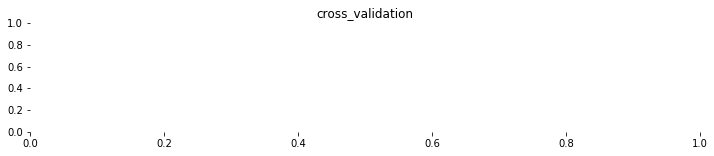

In [8]:
mglearn.plots.plot_cross_validation()
plt.show()

### Cross-validation in scikit-learn

주어진 데이터를 쪼개어 일부는 학습을 시켜 모델을 만드는데 사용하고(training data),
일부는 모델을 검증하는데 사용하는 방법(test data)

- 과적합(overfitting)을 피하기 위해서 사용한다. 

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [9]:
iris = load_iris()

In [10]:
logreg = LogisticRegression()

In [11]:
#cv는 fold개수 
scores = cross_val_score(logreg, iris.data, iris.target,cv=5)

In [12]:
print("cross-validation scores: ", scores) 

cross-validation scores:  [1.         0.96666667 0.93333333 0.9        1.        ]


In [13]:
scores.mean() #교차 검증의 정확도를 보는 일반적인 방법은 평균을 계산하는 것이다.

0.9600000000000002

## 4. Grid Search

- 모델의 성능을 최대로 높여주는 매개변수 값을 찾아야 할 때 
- Grid Search : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도한다. 

In [23]:
#간단한 그리드 서치 구현
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [25]:
iris = load_iris() #iris data
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("training set의 크기:%d, test set의 크기:%d" % (X_train.shape[0], X_test.shape[0]))
# array.shape => array의 행과 열의 개수를 튜플로 반환

training set의 크기:112, test set의 크기:38


In [28]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # test set으로 SVC 평가
        score = svm.score(X_test, y_test)
        
        # 점수가 더 높으면 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
print("최고 점수(모델 정확도):", best_score)
print("최적 매개변수:", best_parameters)
        

최고 점수(모델 정확도): 0.973684210526
최적 매개변수: {'C': 100, 'gamma': 0.001}


### 4-1. 매개변수 overfitting의 위험성과 evalution set (검증 세트)

위 예시에서는 모델의 정확도가 97%임을 확인할 수 있다. 
하지만 이는 test set에 overfitting된 모델일 수 있다. 
따라서 평가를 위해서 모델을 만들 때 사용하지 않은 독립된 data set이 필요하다. 

이를 위해 data set을 
1. training set: 모델 만들기
2. validation set: 모델의 매개변수 선택
3. test set: 선택된 매개변수의 성능 평가

3개의 set으로 나눈다. 

In [29]:
import mglearn
import matplotlib.pyplot as plt

threefold_split


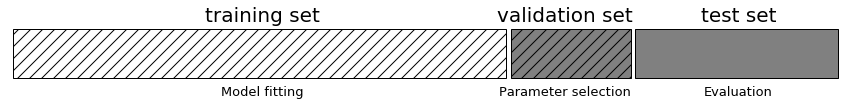

In [30]:
print("threefold_split")
mglearn.plots.plot_threefold_split()
plt.show()

In [33]:
# 전체 data set을 (training + validation), test으로 나눔
X_trainval, X_test, y_traidata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA1cAAABqCAYAAABQzqseAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAHz1JREFUeJztnXm4HVWZr98fGUiYJ5lESFRUQFFacEDRoCIOKE4RURBw%0AaG2bdsDbiAIaxAlsLzj2A40QLjKJgoCAKGBsAgJOoIAoUxCUMBOEJJCQ7/6x1k6KOrXP2UOds+sk%0Av/d59rPPqXpr1dp7V61V3xqqFBEYY4wxxhhjjOmP1QadAWOMMcYYY4xZGXBwZYwxxhhjjDE14ODK%0AGGOMMcYYY2rAwZUxxhhjjDHG1ICDK2OMMcYYY4ypAQdXxhhjjDHGGFMDDq6MGSdImiUpJM3oM50Z%0AOZ1Z9eTMGLOyI2mepHmlZfvnsmT/LtKZnbeZVm8Oh+xnSH6NMWYscHBlTA9ImpYvEGYPOi9mePxb%0AGbPyIWmOJD+oEzeYdcsg64S6GknrpIl5Gu9MHHQGjDEd8x3gDOBvfaZzDbANcH/fOTLGrMqcA1wF%0A3D3ojFTw2kFnwBizauLgyphxQkTcTw0BUUQsBG7qP0fGmFWZiFgALBh0PqqIiFsHnQdjzKqJhwUa%0A0yV56MXt+d/9cnd6FOceFIdpSHqJpAskPVicayBpV0nHS7pR0iOSFkm6XtIXJE2p2m9V131eNkfS%0ARjm9uyU9LukGSQdUpFM5hKQ1zEbSREmfk3RzTudOSUdJmtzm+3ifpN/n/N8r6RRJm3c7bEfS9pJO%0Az3MlHpd0X073WEmTSu5ESR+TdFX+7hZK+oOkAyWtVvBmMcJvZcx4RtLL8vF8zjDOn/M5tUH+f3I+%0AVy6UdEde96CkSyS9sYt9t51zJel1ki6X9FhO+yeSnjdCWj+WdFsuSx6RdIWkfUretFyuvDr/Xzyn%0A5xS8yjlXklaXdIikP+Vy45Gcz3dXuMuHj+W/z5B0v6TFkn4raY9Ov6uc3i6Szpd0V/7O5+cy7AsV%0A7hqSPivp2vwdPirp15L2LnmzgV/mf79Q+j5mdJO/VYFu6gRJu+dz5P78e90q6euS1qtId8T6Kx+P%0Ard/6l8V9d5BvSdpP0pU57cVKdfPFkvaq8LeQ9J18Pj0u6QFJ50naqeT1nCfTHvdcGdM9c4D1gE8A%0A1wE/Kay7tuS+HPgsMBc4EdgIeCKv+wzwPOBK4AJgCvAKYBYwQ9LrIuLJDvO0HnBFTvtHwOrATOBE%0AScsi4uTOPx6nAbsAFwGPAG8CDgY2Bp4SrEk6GDgKeAg4mdSKvVvOS8ct2pK2B64GAjiPVPmtAzwb%0A+BhwGLAku5OA84Hdgb/k/C4GdgW+DbwU2DcnPYfOfytjxh0RcZWkvwBvkrRhRDxQXC/pJaRy5scR%0A8WBevAHwTVLZ8wvgPmAz4C3AhZI+HBEn9JonSe8CziSVR2eShg2+Evg18Mc2m/03cAPwv9nfkFT2%0AnCLpuRFxePYeBo4A9ge2yn+3mDdCviYDF5MCs5uA7wJrAO8CzpT0ooj4XMWmW5GGU98GnEL6/vYC%0Azs3l9C8rtinv+w2kcv4RUhn395zONqQy7oiCux5wGbAD8HtS3bEaqcw7TdJ2EXFY1ltl2n7Ar0hl%0AXot5I+VrFWQOHdQJOeCdBTwI/BS4F9ge+D+kc+3lEfFIdjutv44F3kY6/k6mu9/ny6RriduBH5Lq%0A182AnUh1/ZmFvP8L8HPS8XUxcDbp2uNtwFxJb4+IC7PeT55MOyLCL7/86vIFTCMVpLPbrJ+R1wfw%0AkTbOMwFVLD8yb7dXafmsvHxGaXlrPycAEwrLtwWWAje2ydus0vI5efnvgA0Ky9cEbgGeBDYt5X8J%0A6cLsGYXlAk5v5avD7/Mb2d+zYt36wGoV38O3S593AvD9cjoj/VZ++TXeX6SLrgAOrFj33bzuLYVl%0AqwNbVLjrAteTLiinltbNA+aVlu2f096/sGwt4IFcNuxY8o8plFfTSuueVZGfycClOa2nl9bNGa58%0AaZPf1vd0ITCxsHzj7Aewc2H5tEJ+v1BKa/dWWh3+Rj/O/gsr1m1U+n92dg8uLZ8C/AxYBryosHwG%0AFWW6X21/i2HrBFJDXZAaH9YrrWsd88cUlvVSf83oMs8PAHcBawx3/JA6TW4hNTi+uuRtTgrq7wZW%0A7zdPfrV/eVigMaPLtRFxXNWKiLgtcslW4pj8vnsX+1kIHBSFnq6IuJHUg7SNpLW6SOszsaKFm4h4%0ADDiV1HK6Y8F7L6kg/3ZE3FnwAziEFIx1y6Lygoh4KCKWASgN+fsPYD7wqdLnfRL4NKmSeF8P+zZm%0AvHIK6YJ7v+LC3FPzHlKr+0Wt5RHxeETcVU4k0hyqE0kXhDuV13fInqQW89Mi4reldbNo06MdFXOk%0AIuIJUnA4kXpuUPEBUvlwUEQsLeznXlKjFsCHKra7A/hSKW8Xk24u9JIu81BVxi2fSytpQ2Af4LcR%0AcXTJW0wa8SBS+WtGh4/n9w9HxMPFFRExm9TDVVXHDFt/1cASKurV4vEDvBl4Fqle/lXJ+wdwNLAp%0AvuHLqOJhgcaMLte0WyFpTdLQhLcDzwHWJlWaLZ7exX5ujjxEoUQr6FkfeLTDtMoXROV0WuyQ3+eW%0A5Yi4Q9KdpBbCTjiT9F38RNKPgEuAKyouuJ5DunC7GThMEhUsIg21MWaVICLuknQpsJukbXPDCqRh%0AfhuQWtmXFreRtB3wn8CrSMOLyvM8uyl/ivxLfv9VeUVELJB0LXm+VCk/W5ICh9cCWwJTa8pPK/21%0AScO0/h4RVTf0uSy/71Cx7tqoHqJ9J2nodyecCrwDuFrSmaR5UldUBLk7kXrh291avTX/1GXc6PFy%0AUiAzU9LMivWTgacVhuF2Wn/1w6mkhsUbJf2QdH79OjeIlPMOsFWb42fr/L4NqQfXjAIOrowZXeZX%0ALczzhi4jtXpeTyqc7yPPKyJNMF29i/083GZ564JqQqcJlVvqhkln3fx+T5uk7qHD4CoirpG0C3Ao%0Aaf7DvgB5LskREXF6VjfM71uzYhJuFd301BmzMjCbNN9xP1KQAit6sp4y51LSy0jlz0TSsLvzSHOB%0AlgEvIvU+dVP+FBmpXBhSJkp6Jqkhan3gctJ8kQWkVvpp+XP0mp9yvtrdNr61fMjNChi+fO1oBFBE%0AnJ1vgPFpUg/aRwAk/Q74bET8IqutMm4nhu89dBk3emxIOjeGq2MgD4Htov7qh0+R5vwdQBoZcgiw%0AVNKFwKcj4pZC3iHNwxop72aUcHBlzOjS7o47e5ICq9kRUb5JxGaMXKg3gVZP2SakiehlNukmsYj4%0ANbCHpNWBFwNvILXUnSbpvoi4hBVDis6JiHf0lm1jVkrOIZ2T+0j6HOki643AdRFxXck9jNQztGtE%0AzCmukPRZUvnUK61ztN35v2nFsoNI+T0gD7sq5mdvSsMd+8xX1f4h9d4VvdqJiAuAC/KohZcCewD/%0ABvxU0g65x7G1/2Mi4qDRyosZlgWkeVIbdLpBh/VXz+Se02OBYyVtTLpBzHtIQdR2+SYnj7Pi+Nkz%0AIs7rZ5+mdzznypjeaA0R6bhHqMSz8/vZFeuGDJlpKH/I768sr5C0FfCMXhLN80GujIjPs2Lse+ti%0A7yZSK/LLVLo9+zD0+1sZ03giYhHpLmKbA69jxZzIqjuFPht4sBxYZfotf37fLh1J65J6xqryA+mm%0AD53m58mcZkfndUT8E7gVeLqkrSuUXfP77yvW1UpEPBYRl+Xg6SukYWatW+BfQ+pB3KWLJF3GdcdI%0A39dVwPp56GxXjFB/dbLvTvZxb0ScHRHvJvVAPwt4fl59VX738TNAHFwZ0xsPkXqltuxx+3n5fUZx%0AYR4ec1TPuRpbTiMNi/kPScsDKaWJUF+li4Ja0s6SynMsYEXr90KAPG/k26RW5m9VbSNpM0nbFhb1%0A+1sZM16Ynd/fn19LSXM1yswDNsi3kF6OpA/S3Y10qjiXdM69V9KOpXWzWDE8r5wfGFoe7k71DSYg%0A3T0NujuvTyTNa/16MSiTtBFweMGpHUmvklQ1Wqhcxt1L+s12lHR4VfAo6VmSphcW9fJdrMqMVCe0%0Abir1P5I2L6+UtGYeWtv6v6P6K9P1b6X0bLZXVCyfRJpTWdzHuaRGhH+X9KY26b1c0hr95MkMj4cF%0AGtMDEfGopKuBXSSdCvyV1PpzXkS0e45LkfNJt0s9SNILSL1AW5KGiVzAOCjkIuJWSZ8ntbxelydp%0At55ztQHpGSLbD5NEkYOB10i6nPQcj0eB7UituQ8BxxfcI4EXAh8F3iLpMtLtZTcmzcV6BWns+405%0An/3+VsaMCyLiCkm3kIYKTQLOzxfrZY4lBVFz8+T4BaQ7gb6S9Jy8d/WRh0cl/StpHunluVxoPefq%0A+aTnWL2qtNn3SHNJzso3BPhHdt9A6o0b8pBU0lyxmcDZed7JIuCOiDhlmOz9F6lM2ZNUZl1Ies7V%0ATFL5cXREDLlBT018i9RrdgUpmHyCNHzsNaS7EZ5RcA8klWVfBPaVNJc0h21z0o0IdgL2ZsXDcP9C%0AKgPfI2lJTi+AUyLijlH6POOWkeqEiLhU0iGkRsKb83FyO2me0lak3tS5pOMTuqu/fknqmfyqpOfn%0A9UTEU+5GWWIq6Vy9hfSolDtIN6DZjXQ8nBcRf87pLJH0DtLzrS6QdCXp7oYLSaNJdiI9RmUzVgRk%0AveTJDMdo3ePdL79W9hdpKMv5pFafZRSe90IHzx0hFXSnkirFRaR5SweTGj0CmFPyZ9H+OVdz2uxj%0ANqVnyrTLG8M8N4aK59kU1u1LCg4Xk27K8QPSRcD1wMMdfpevB04iBUQLgMdIFwzfAraq8JX3eynp%0AmTxP5O9xLvA5Cs/dGum38suvlelFmk/VejbTO4fx9iANIfonaajtz0lBT+W5TofPuSqs2y2fjwtJ%0AF2vnkh5mPKRMyv7OpCFOD+U8zSU93LRdeTWB1LBzG+lGQE8pB6vym5dPyWXE9aRyt7WvvSvcaQz/%0APKS2ZWaF+27S8/9uJl18P5Lz8GXgaRX+ZFKQdWUuEx8n3fr9UuCTwIYlf6e8bkGhjJsx6OOxqa9O%0A6gRSg8APScH+E6T67Vrg/1J4hhvd11/75HQWtc7VEfI6iXRtcFE+Blp17VWkRsbJFdtsDHwtH2ML%0A8zF3M6nxZB8Kz3nrJU9+Df9S/lKNMaY2JK1Damm9NiI6vVWxMcYYY8y4xnOujDE9I+lp5RtL5HkF%0A3yC1EJ8zkIwZY4wxxgwA91wZY3pG0kdJ8wIuIT1QcwPS0KLnkIYY7BzpLmbGGGOMMSs9vqGFMaYf%0AribNV3gVKx5eeDtpHsFRDqyMMcYYsyrhnitjjDHGGGOMqQHPuTLGGGOMMcaYGnBwZYwxxhhjjDE1%0A0NOcq6lTp85fvHjxJiObxhhjjBkkU6ZMuWfRokWbFpdNmjTpnqVLl248qDyZ0WXixIn3LlmyZPl1%0A2qRJk+YvXbrU123GjMDEiRPvWbJkyaYjm+3pac6VpGhtN2fOHGbOnMlZZ53FjBkzRtzWvn379u3b%0Atz92viQiQqVlMWvWrGHTv/322znrrLOYOXMm06dPHzE/9pvjn3zyyU/5zTv5vY0xMGvWrCHlZbf0%0ANSywKRWHffv27du3b78+mhw42O/fN8aMHj0HV02rOOzbt2/fvn37/dO0QMB+vb4xZnTpObhqUsVh%0A3759+/bt26/2u6FpgYD9en1jzOjTc3DVpIrDvn379u3bt1/td0rTAgH79frGmLGh5+CqSRWHffv2%0A7du3b7/a74SmBQL26/WNMWNHz8HVSDS5orFv3759+/btJ5oWCNiv1zfGjC2jElw1reKwb9++ffv2%0A7Q+laYGA/Xp9Y8zYU3tw1bSKw759+/bt27c/lKYFAvbr9Y0xg6HW4KppFYd9+/bt27dvv5omBQL2%0A6/WNMYOjtuCqaRWHffv27du3b789TQkE7NfvG2MGRy3BVdMqDvv27du3b9/+8DQlELBfv2+MGRx9%0AB1dNqzjs27dv3759+/3T1MDB/si+MWZw9BVcNa3isG/fvn379u33T5MDB/v9+8aY0aPn4KppFYd9%0A+/bt27dvv3+aFgjYr9c3xowuPQdXTao47Nu3b9++ffvVfjc0LRCwX69vjBl9eg6umlRx2Ldv3759%0A+/ar/U5pWiBgv17fGDM29BxcNanisG/fvn379u1X+53QtEDAfr2+MWbs6Dm4GokmVzT27du3b9++%0A/UTTAgH79frGmLFlVIKrplUc9u3bt2/fvv2hNC0QsF+vb4wZe2oPrppWcdi3b9++ffv2h9K0QMB+%0Avb4xZjDUGlw1reKwb9++ffv27VfTpEDAfr2+MWZw1BZcNa3isG/fvn379u23pymBgP36fWPM4Kgl%0AuGpaxWHfvn379u3bH56mBAL26/eNMYOj7+CqaRWHffv27du3b79/mho42B/ZN8YMjr6Cq6ZVHPbt%0A27dv3779/mly4GC/f98YM3r0HFw1reKwb9++ffv27fdP0wIB+/X6xpjRpefgqkkVh3379u3bt2+/%0A2u+GpgUC9uv1jTGjT8/BVZMqDvv27du3b99+td8pTQsE7NfrG2PGhp6DqyZVHPbt27dv3779ar8T%0AmhYI2K/XN8aMHT0HVyPR5IrGvn379u3bt59oWiBgv17fGDO2jEpw1bSKw759+/bt27c/lKYFAvbr%0A9Y0xY0/twVXTKg779u3bt2/f/lCaFgjYr9c3xgyGWoOrplUc9u3bt2/fvv1qmhQI2K/XN8YMjtqC%0Aq6ZVHPbt27dv37799jQlELBfv2+MGRy1BFdNqzjs27dv3759+8PTlEDAfv2+MWZw9B1cNa3isG/f%0Avn379u33T1MDB/sj+8aYwdFXcNW0isO+ffv27du33z9NDhzs9+8bY0aPnoOrplUc9u3bt2/fvv3+%0AaVogYL9e3xgzuvQcXDWp4rBv3759+/btV/vd0LRAwH69vjFm9Ok5uGpSxWHfvn379u3br/Y7pWmB%0AgP16fWPM2NBzcNWkisO+ffv27du3X+13QtMCAfv1+saYsaPn4GokmlzR2Ldv3759+/YTTQsE7Nfr%0AG2PGllEJrppWcdi3b9++ffv2h9K0QMB+vb4xZuypPbhqWsVh3759+/bt2x9K0wIB+/X6xpjBUGtw%0A1bSKw759+/bt27dfTZMCAfv1+saYwVFbcNW0isO+ffv27du3356mBAL26/eNMYOjluCqaRWHffv2%0A7du3b394mhII2K/fN8YMDkVE1xtNnTp1/uLFizcZhfwYY4wxpkamTJlyz6JFizYtLps0adL8pUuX%0Auh5fSZk4ceI9S5YsWf6b+/c2pjPK504v9BRcGWOMMcYYY4x5KrXe0MIYY4wxxhhjVlUcXBljjDHG%0AGGNMDTi4MsYYY4wxxpgacHBljDHGGGOMMTXg4MoYY4wxxhhjasDBlTHGGGOMMcbUgIMrY1ZCJC2V%0ANKNDd4akpSM4h0i6R9KjknaSdJGkg3vI1+cknd/tdsYYM0gkTZMUkrYYxX3cIGmv0UrfjC35eHnl%0AKO/Dx0wDcXBlzACQNCcXvO8uLX9pXj5vQFkbQr6Y+Aqwa0SsFRG/iYg3RsTRBWdIJZI/42HFZRHx%0AlYh4y9jk3JhVi3zOPZ4bQRZI+oOkdw46X90iaZ6kfQadj9GiXaAWEdtFxJmDyteqSOmcKb5eMOi8%0AFfExM75wcGXM4Pgz8OHSsg/n5U1iGrAsIm4cdEaMMSNyZESsBWwInA6cKek53SYiaaKkcXuNIGny%0AoPNgxg1H5obD4utPg86UGb+M24LTmJWAs4EdJD0TQNLawDuBk4qSpDUkfVPSnZLul/QTSVsW1q8t%0A6WRJD0q6Q9J+5R1Jepuk30l6WNKfJb2vkwzm4Qa/ACbk1rxb8/LlvVKSrsv6z7NzgqTvALsAh+dl%0Af8nuLEmXFNKfl4cKXpq96yXtXFg/SdIxku6VNF/SwZJukbR/J/k3ZlUlIpYC3wMmAC8AkPQVSbe1%0AzmVJn2z5hZbxD0q6EXgM2FjSeyRdJ+kRSXdLOk7SmoXt5kk6TNIvc7p/krS9pL3zuboglwkTC9ts%0AKelH+Zy+W9LxufwjDxveEjghp/fzvHxiLiv+msuxKyTtWEhztqRT8/uDwDfL34mk1fO+7s2f52ZJ%0AMwvrd5E0N5elt0r6tCS1+45HKlclvVrS5Tm9+yXNzqtaZeZf8mc8vPBd7lPa/ur8Hd4k6SOFdTOU%0Ahn/vlfO6QNIPW9+j6Q9Jb87HyaTCsrXy7/Xq/H/b86kivf0l3VJaNlvSCYX/T1Kq5/8p6UZJ7y3o%0APmbGEQ6ujBkci4FTgQ/m//cGfgXcXfKOAV6WX1sB9wPnS5qQ1x8LbA1sC2wP7Em6oAJA0m7A94FP%0AAhsA+wHfkfSqkTKYhxu8EXgyt+Y9q8J5Yf7z9dn5UEQcCFzOihbB5w6zmw8AHwfWJQVyJxfWfTbv%0A/2XAdGCL/B0YY4ZBqefm34ElrLgwuxF4JbA2qZf8q5J2L236XuA12bkPWJCXrUdqMNkFOKy0zX7A%0Ax4D1877OAXYFXkgK7N4K7JXzNQW4LOdlOqnc2oIcDOVhw38DPpTLjtfnfRxBKtveQOqVOxH4maT1%0AC/mYCVwEPA34dMXXsh+wE7BNRKyTP+cNOV/bAhcCX8/bvxk4ENi3Ip0Ry1VJ2wMXZ2cz4BnA7Lx5%0Aq8x8bv6MR1akPx34GfDf+fPuT/q9Zha0CcDrc3rPAXYglaWmf34GLCUdBy1mAvOB/83/d3I+dcNc%0A4EWkc+2LwOx8XIKPmXGFgytjBsv/AAfkVt1/zf8vR2lYzn7AYRHx94h4jFSZbwO8JK9/H3B4RMyP%0AiAXAZ0r7+ATwzYi4PCKWRcQ1wA+A94/qJ+uc4yLihoh4EjgBeLakdfO69wNHR8RtEbGI9NmWDSqj%0AxowDDpX0MHAXKRh5Z0TcAhARP4iIf0TiMuAC4LWl7Y/IZckTEfFkRFyUz89lOZ3vVWxzfET8OSKW%0AAKcBzwQOjYjHIuJvwByg1cu0B6CI+HxELIqIh4DDgfcVGoyeQu49+jjwn7kseDIivk9qiCpe/M6N%0AiDPz+oUVST0BrAVsK2liRNxZGO78MeCsiDg3b38T8B3al5MjlasfBc6PiNkR8Xj+rHPapFXF3sDv%0A8/ZLI+Iq4DjgQyXvkIh4NCLuAX7Ciu/ZdM6hufdx+SvXR6cABxS8A4CTIiKg4/OpYyLi+xHxQD7+%0AzgD+CMzoIgkfMw1h4siKMWa0iIjrJd1BurjYmNTqtHdBeRqwOnB7YZtHJd1Lagm9La+fV9jmdp7K%0AdGBXSQcVlk0g9Sw1gWJP3WP5fW1Si/nTgTtaKyNikaT7xjBvxow3vhwRX6paIenjpBb2LQABU0nB%0AUJF5pW12Az4PPI9U1kwA7i1tUzyHF5J6uu8rLWsNPZoObJkDwCIBbAr8vSLrG5GCovMlRWH5pPxZ%0AKvNewQ+ATUijAbaWdClwcA4apwOvkfSOgr8acGebtEYqV6cBfxghP8PxDIaW5beSAuYW5e/5MVZ8%0Az6Zz2p0zJwF/lLQx6XvdmdSLC3R8PnVEbiidRerh3ZR0PqxJugboFB8zDcE9V8YMnuNJwdWJubWs%0AyH3A46SKGkjjvkmB2J2kIYJPFNeX/oYUnMyKiPUKr7Uj4k01foaoWFZHD9PfKQwDlDSV7iobYwwg%0A6RXAUcBHgI0iYj3gfNJFYZFlhW0mk1q2zwC2zEPpPlOxTTfcAfy1VB6tFxFTIqIVWJXLjvtJF4Gv%0AK22zZkR8rSrvVeTW/KMiYkdSubKQNLywla8TS+mvExHbDfM5hitX55GGa1fRSdl4J0PL8mfSPtgz%0ANZN7L38H7EMaYndJRNwFXZ1PLf5JCpaKbF74e29SD9M7gfVzetcV0vMxM45wcGXM4DmdNAZ6yATs%0AiFgG/D/gSEmbS1oD+AZwE3BNDsZOA46QtImkdYCvlZI5FvhUnqw9QdJkSS9WYTJ4Dcxn6IXEfODZ%0AfaZ7CvCfkqbnuRpfxeWWMb2wDvAkqcEmJL2ZNJ9xOCaTeqseyr3G25LmIfXDT4HJSjenWFuJp0t6%0Ae8F5SnmSh2F9E/gvSVvD8psL7C5pczpE0mty2TcJWEQK2FoNWt8D3iPpLUo30pkoadvWzQsqGKlc%0APQ54q6R9lW6kMVUrnj14H+liuV3wBaleeLGk9+e8vIR0If/9Tj+vqYWTSPOC38+KQBy6P5+uJd0g%0AZg9Jq+XjvTjveR3SHK/7gNUkfYAV86zAx8y4whcpxgyYiFgcEZfkuQdVfAr4LfAb0kTvzYC3Fnq5%0APkEaCnAT8CdS69nyHrCI+Dlp6MLXSS3Ad5OGxaxV48c4FPiipIckHZeXHQPsmMew39Bjul8l3eTi%0AGlJL8N3AP0i9ecaYzrmY1FBzDakceBfpxhNtiYhHgX8Djpb0KPBdehz2VEhzIelGEtuSyqwFwKWk%0AifwtvgTsk8uTi/KyLwDnAudKegS4mTSvqZvrmE1IDTYPkcqSrUhzXYmI60nzwT6Z191LugFFZU/5%0ASOVqRFwHvIn0/d1DKrv3zesWkUYrnJ7Lx0Mr0r89b38g8EDO9+ER8cMuPq/pjNZdbYuvPfK6M0i9%0AP2uRjr8WXZ1PEXErqa4+HniQdGOWHxeUk4GrgVtIIza2pTB038fM+EJ5Xp4xxjSePCTyIeDVEXHl%0AoPNjjDHGGFPEPVfGmMYiaQNJb8jDdNYFvkXqwfrNYHNmjDHGGDMUB1fGmCazGmmI0IOkoY9bkIZE%0ALhlorowxxhhjKvCwQGOMMcYYY4ypAfdcGWOMMcYYY0wNOLgyxhhjjDHGmBpwcGWMMcYYY4wxNeDg%0AyhhjjDHGGGNqwMGVMcYYY4wxxtSAgytjjDHGGGOMqYH/D0N963hYmUlFAAAAAElFTkSuQmCCnval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# (training + validation) set을 training, validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("size of training set: %d,  size of validation set: %d,  size of test set: %d" % (
        X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


size of training set: 84,  size of validation set: 28,  size of test set: 38


In [34]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련    
        svm = SVC(gamma=gamma, C=C)
        
        # train set으로 model fitting
        svm.fit(X_train, y_train)
        
        # validation set으로 SVC 평가         
        score = svm.score(X_valid, y_valid) 
        
        # 점수가 더 높으면 기록 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}


In [35]:
# training set과 validation set을 합쳐 모델을 다시 만든 후 
# test set을 이용하여 모델을 평가 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("validation set에서 최고 점수: ", best_score)
print("최적 매개변수: ", best_parameters)
print("최적 매개변수에서 test set의 점수(모델 정확도): ", test_score)

validation set에서 최고 점수:  0.964285714286
최적 매개변수:  {'C': 10, 'gamma': 0.001}
최적 매개변수에서 test set의 점수(모델 정확도):  0.921052631579


validation set의 정확도는 약 96.4%로 앞의 결과보다 약간 낮아짐.
(데이터를 한번 더 나누었기 때문에 X.train이 더 작아졌기 때문)
실제 봐야하는 모델 정확도는 이보다 더 작은 약 92.1%이다. 

### 4-2. 교차 검증을 이용한 Grid search

더 향상된 성능을 위해 단순히 training, validation set으로 나누는 것이 아니라 교차 검증을 이용하여 매개변수 간 결합을 평가한다. 

교차 검증을 이용한 grid search는 많이 사용되므로 scikit-learn은 이를 사용할 수 있는 **GridSearchCV**를 이용한다. 

In [36]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} 
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# overfitting 방지를 위해 training, test set으로 나눔
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("최적 매개변수 : ",grid_search.best_params_) 
print("최상 교차검증 점수 : ",grid_search.best_score_)
print("최고 성능 모델 : ",grid_search.best_estimator_)

최적 매개변수 :  {'C': 100, 'gamma': 0.01}
최상 교차검증 점수 :  0.973214285714
최고 성능 모델 :  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### *교차검증 분석하기 

교차 검증의 결과를 시각화하면 매개변수가 모델의 일반화에 얼마나 영향을 주는지 이해할 수 있다. 

In [39]:
import pandas as pd
from IPython.display import display

In [46]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001200,0.000600,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.995424e-04,4.896683e-04,0.011371,0.002852
1,0.000999,0.001000,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.504023e-07,3.568323e-07,0.011371,0.002852
2,0.001000,0.000400,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,6.327878e-04,4.900961e-04,0.011371,0.002852
3,0.002399,0.000400,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,2.330584e-03,4.899209e-04,0.011371,0.002852
4,0.002797,0.001201,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,1.468210e-03,3.960648e-04,0.011371,0.002852
5,0.001201,0.000200,0.366071,0.366079,0.001,100,"{'C': 0.001, 'gamma': 100}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.022837e-04,3.999710e-04,0.011371,0.002852
6,0.000600,0.000400,0.366071,0.366079,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.897458e-04,4.895704e-04,0.011371,0.002852
7,0.000799,0.000400,0.366071,0.366079,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.997089e-04,4.896288e-04,0.011371,0.002852
8,0.000799,0.000200,0.366071,0.366079,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.994472e-04,3.997803e-04,0.011371,0.002852
9,0.000600,0.000400,0.366071,0.366079,0.01,1,"{'C': 0.01, 'gamma': 1}",22,0.375000,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.895510e-04,4.896289e-04,0.011371,0.002852


2차원의 매개변수 grid를 가지므로 히트맵(heat map)을 이용하여 시각화 한다. 
x축에 'gamma', y축에 'C', 각 격자안에 교차 검증의 평균값을 입력한다. 

C:\Users\yu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


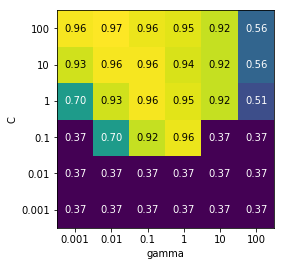

In [41]:
scores = [score.mean_validation_score for score in grid_search.grid_scores_]
scores = np.array(scores).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis")
plt.show()